In [1]:
import pandas as pd

telemetry = pd.read_csv('/home/aveleyra/Documentos/mlops-exercise-walmart/data/PdM_telemetry.csv')
errors = pd.read_csv('/home/aveleyra/Documentos/mlops-exercise-walmart/data/PdM_errors.csv')
maint = pd.read_csv('/home/aveleyra/Documentos/mlops-exercise-walmart/data/PdM_maint.csv')
failures = pd.read_csv('/home/aveleyra/Documentos/mlops-exercise-walmart/data/PdM_failures.csv')
machines = pd.read_csv('/home/aveleyra/Documentos/mlops-exercise-walmart/data/PdM_machines.csv')

In [2]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


Text(0.5, 0, 'Date')

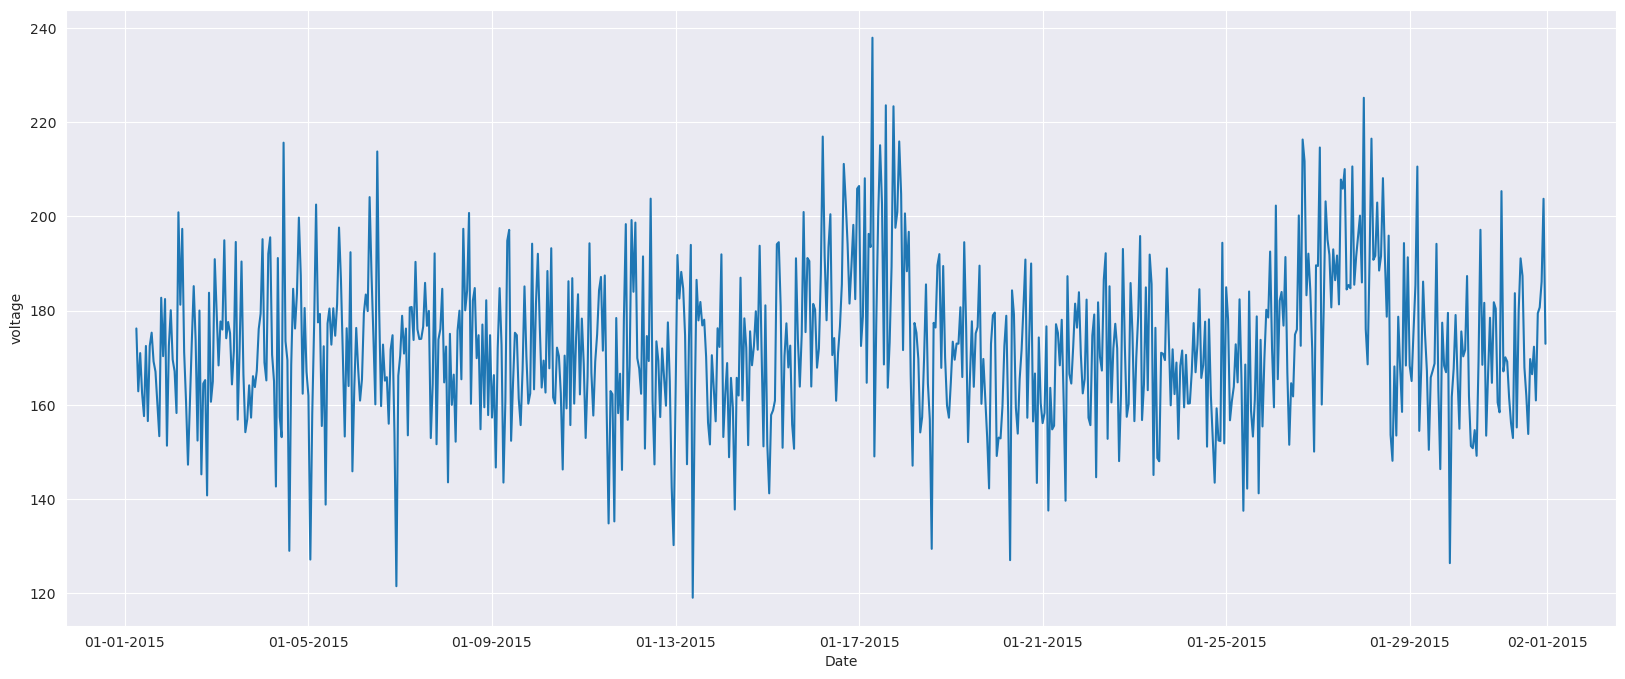

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

In [4]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


errorID
error1    1010
error2     988
error3     838
error4     727
error5     356
Name: count, dtype: int64

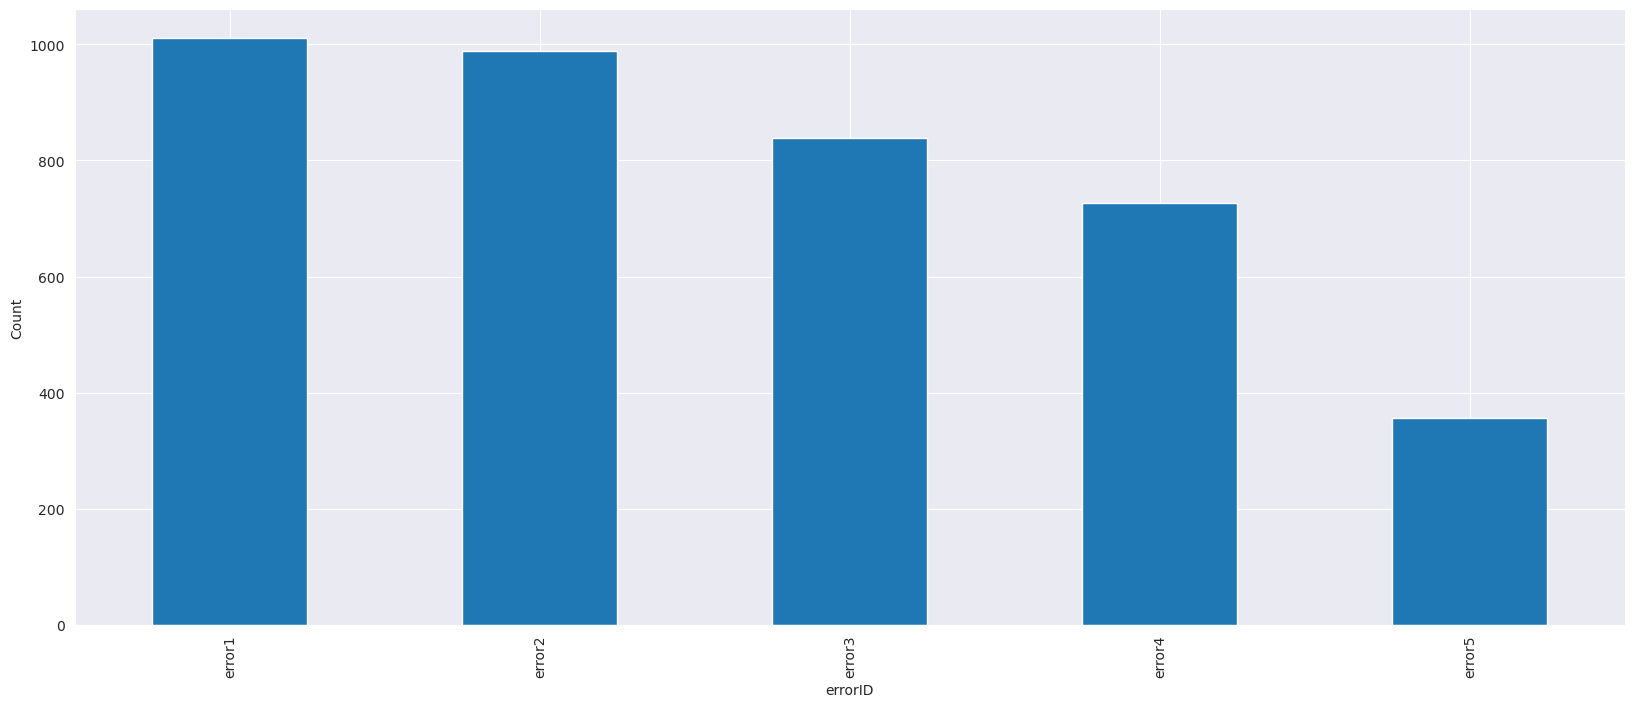

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

In [6]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


comp
comp2    863
comp4    811
comp3    808
comp1    804
Name: count, dtype: int64

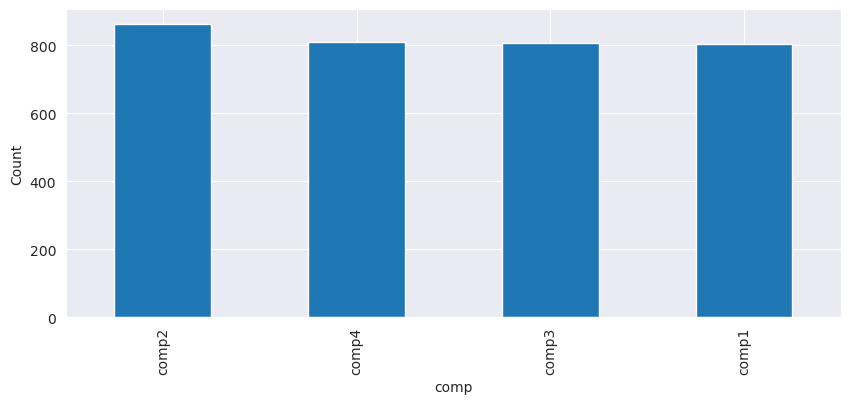

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()

In [8]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


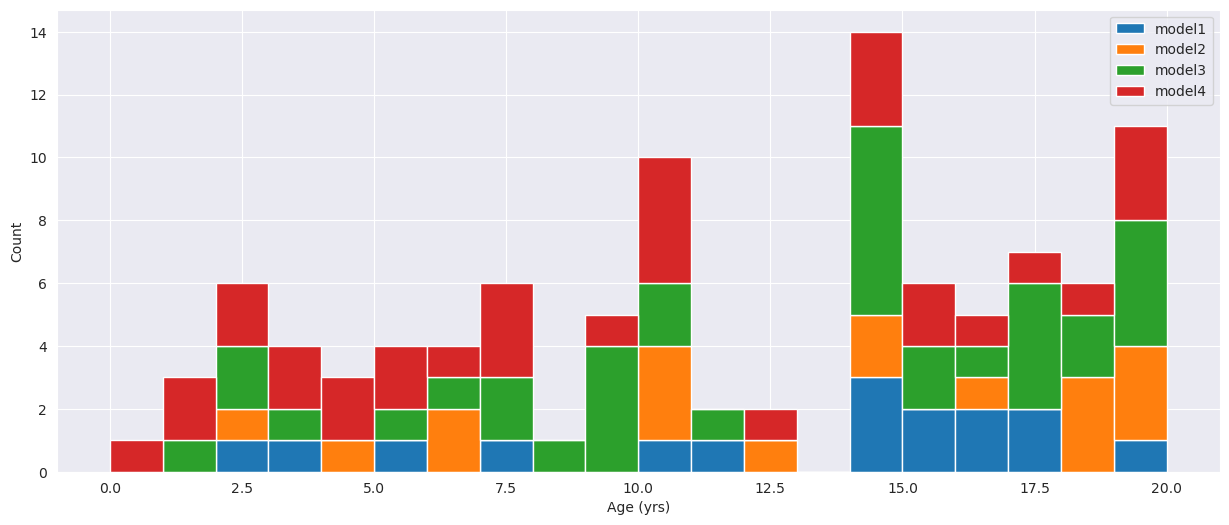

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [10]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


failure
comp2    259
comp1    192
comp4    179
comp3    131
Name: count, dtype: int64

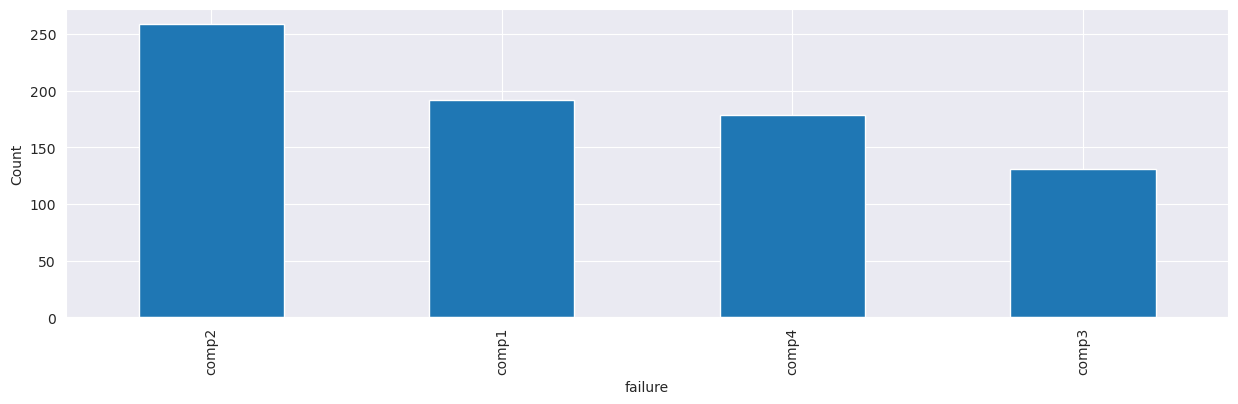

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')
failures['failure'].value_counts()


In [12]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

/tmp/ipykernel_16412/894391920.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/894391920.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/894391920.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/894391920.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,


In [13]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

/tmp/ipykernel_16412/1369356118.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/1369356118.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/1369356118.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/1369356118.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/1369356118.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,
/tmp/ipykernel_16412/1369356118.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [14]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',
                                               columns='machineID',
                                               values=col).rolling(24).mean().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,index='datetime',
                                               columns='machineID',
                                               values=col).rolling(24).std().resample('3H',
                                                                                closed='left',
                                                                                label='right').first().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]
telemetry_sd_24h.reset_index(inplace=True)

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)

/tmp/ipykernel_16412/719859507.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,index='datetime',
/tmp/ipykernel_16412/719859507.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,index='datetime',
/tmp/ipykernel_16412/719859507.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,index='datetime',
/tmp/ipykernel_16412/719859507.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,index='datetime',
/tmp/ipykernel_16412/719859507.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(telemetry,index='datetime',
/tmp/ipykernel_16412/719859507.py:18: F

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


In [15]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,290601.000000,290601,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000
mean,50.380935,2015-07-02 22:00:42.478862848,170.774427,446.609386,100.858340,40.383609,13.300173,44.453951,8.885780,4.440575,170.775661,446.609874,100.857574,40.383881,14.919452,49.950788,10.046380,5.002089
min,1.000000,2015-01-02 06:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.000000,2015-04-03 00:00:00,164.447794,427.564793,96.239534,38.147458,8.028675,26.906319,5.369959,2.684556,168.072275,441.542561,98.669734,39.354077,13.359069,44.669022,8.924165,4.460675
50%,50.000000,2015-07-02 21:00:00,170.432407,448.380260,100.235357,40.145874,12.495542,41.793798,8.345801,4.173704,170.212704,449.206885,100.099533,40.072618,14.854186,49.617459,9.921332,4.958793
75%,75.000000,2015-10-01 15:00:00,176.610017,468.443933,104.406534,42.226898,17.688520,59.092354,11.789358,5.898512,172.462228,456.366349,101.613047,40.833112,16.395372,54.826993,10.980250,5.484430
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783
std,28.798424,NaN,9.498824,33.119738,7.411701,3.475512,6.966389,23.214291,4.656364,2.319989,4.720237,18.070458,4.737293,2.058059,2.261097,7.684305,1.713206,0.799599


In [16]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,15.726970,39.648116,11.904700,5.601191
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,15.635083,41.828592,11.326412,5.583521
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.995465,40.843882,11.036546,5.561553
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.100364,43.409841,10.972862,6.068674
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.808489,43.742304,10.988704,7.286129


In [17]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [18]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False
5,2015-01-25 15:00:00,1,False,False,False,True,False
6,2015-01-27 04:00:00,1,True,False,False,False,False
7,2015-03-03 22:00:00,1,False,True,False,False,False
8,2015-03-05 06:00:00,1,True,False,False,False,False
9,2015-03-20 18:00:00,1,True,False,False,False,False


In [19]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [20]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,datetime,machineID,error1,error2,error3,error4,error5
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-07-02 18:00:00,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015-10-02 00:00:00,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-01-01 06:00:00,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154


In [21]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).rolling(24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

/tmp/ipykernel_16412/2362514965.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(error_count,
/tmp/ipykernel_16412/2362514965.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(error_count,
/tmp/ipykernel_16412/2362514965.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(error_count,
/tmp/ipykernel_16412/2362514965.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(error_count,
/tmp/ipykernel_16412/2362514965.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp.append(pd.pivot_table(error_count,


,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,2015-07-03 07:30:00,0.027649,0.027069,0.022907,0.019904,0.009753
min,1.00000,2015-01-02 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,2015-04-03 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,2015-07-03 07:30:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,2015-10-02 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2016-01-01 09:00:00,2.000000,2.000000,2.000000,2.000000,2.000000
std,28.86612,NaN,0.166273,0.164429,0.151453,0.140820,0.098797


In [22]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [23]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']

    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')

comp_rep.describe()

/tmp/ipykernel_16412/2801162073.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2014-12-13 06:00:00', '2015-01-05 06:00:00', '2015-01-20 06:00:00',
 '2015-03-06 06:00:00', '2015-03-21 06:00:00', '2015-06-19 06:00:00',
 '2015-07-19 06:00:00', '2015-08-03 06:00:00', '2015-09-02 06:00:00',
 '2015-10-02 06:00:00',
 ...
 '2014-09-14 06:00:00', '2015-02-12 06:00:00', '2015-03-14 06:00:00',
 '2015-03-29 06:00:00', '2015-04-13 06:00:00', '2015-04-28 06:00:00',
 '2015-07-27 06:00:00', '2015-09-10 06:00:00', '2015-09-25 06:00:00',
 '2015-10-10 06:00:00']
Length: 804, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
/tmp/ipykernel_16412/2801162073.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a fu

,datetime,machineID,comp1,comp2,comp3,comp4
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,53.525185,51.540806,52.725962,53.834191
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.750000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.500000,32.791667,29.666667,32.291667,32.500000
75%,2015-10-02 00:00:00,75.250000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866087,62.491679,59.269254,58.873114,59.707978


In [24]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
365,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
465,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
565,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
665,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
765,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [25]:
telemetry_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,15.726970,39.648116,11.904700,5.601191
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,15.635083,41.828592,11.326412,5.583521
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.995465,40.843882,11.036546,5.561553
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.100364,43.409841,10.972862,6.068674
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.808489,43.742304,10.988704,7.286129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291395,100,2015-10-05 09:00:00,188.267556,407.256175,108.931184,36.553233,9.599915,40.722980,1.639521,5.724500,171.826650,441.278667,98.311919,39.196175,16.429023,62.147934,7.475540,5.448962
291396,100,2015-10-05 12:00:00,167.859576,465.992407,107.953155,42.708899,14.190347,92.277799,9.577243,0.735339,174.657123,444.147310,98.520388,38.820190,17.019808,64.730136,8.961444,5.833191
291397,100,2015-10-05 15:00:00,170.348099,434.234744,104.514343,38.607950,10.232598,49.524471,12.445345,2.596743,173.787879,448.842085,100.028549,39.375067,17.096392,64.718132,9.420879,5.738756
291398,100,2015-10-05 18:00:00,152.265370,459.557611,103.536524,40.718426,6.758667,27.051145,12.824247,2.752883,172.496791,442.086577,100.361794,38.943434,15.119775,65.929509,8.836617,6.139142


In [26]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-02 06:00:00   180.133784     440.608320        94.137969   
1          1 2015-01-02 09:00:00   176.364293     439.349655       101.553209   
2          1 2015-01-02 12:00:00   160.384568     424.385316        99.598722   
3          1 2015-01-02 15:00:00   170.472461     442.933997       102.380586   
4          1 2015-01-02 18:00:00   163.263806     468.937558       102.726648   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         41.551544  21.322735    48.770512       2.135684       10.037208   
1         36.105580  18.952210    51.329636      13.789279        6.737739   
2         36.094637  13.047080    13.702496       9.988609        1.639962   
3         40.483002  16.642354    56.290447       3.305739        8.854145   
4         40.921802  17.424688    38.680380       9.105775        3.060781   

   ...  error2count  error3count  error4coun

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,290601.000000,290601,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,...,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000
mean,50.380935,2015-07-02 22:00:42.478862848,170.774427,446.609386,100.858340,40.383609,13.300173,44.453951,8.885780,4.440575,...,0.027560,0.027058,0.022846,0.019955,0.009780,53.382610,51.256589,52.536687,53.679601,11.345226
min,1.000000,2015-01-02 06:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015-04-03 00:00:00,164.447794,427.564793,96.239534,38.147458,8.028675,26.906319,5.369959,2.684556,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,7.000000
50%,50.000000,2015-07-02 21:00:00,170.432407,448.380260,100.235357,40.145874,12.495542,41.793798,8.345801,4.173704,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-01 15:00:00,176.610017,468.443933,104.406534,42.226898,17.688520,59.092354,11.789358,5.898512,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,65.875000,67.125000,70.250000,16.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.798424,NaN,9.498824,33.119738,7.411701,3.475512,6.966389,23.214291,4.656364,2.319989,...,0.166026,0.164401,0.151266,0.140998,0.098931,62.478424,59.156008,58.822946,59.658975,5.826345


In [27]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features['failure'] = labeled_features['failure'].cat.add_categories(
    'none')
labeled_features['failure'] = labeled_features['failure'].fillna("none")
labeled_features.head()

/tmp/ipykernel_16412/917952460.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [28]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
17,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,1.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
18,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,1.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
19,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,1.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
20,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,1.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
21,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,1.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
22,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
23,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1337,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,28.155693,42.557599,7.688674,2.488851,...,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4
1338,1,2015-06-18 12:00:00,190.691297,441.577271,97.192512,44.025425,6.296827,47.271008,7.577957,4.648336,...,0.0,0.0,1.0,89.250,29.250,14.250,134.250,model3,18,comp4


In [36]:
labeled_features['failure'].unique()

['none', 'comp4', 'comp1', 'comp2', 'comp3']
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [33]:
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 0) Datos y tipos
# -----------------------------
df = labeled_features.copy()

# Asegura datetime
if not np.issubdtype(df["datetime"].dtype, np.datetime64):
    df["datetime"] = pd.to_datetime(df["datetime"])

DROP_COLS = ["datetime", "machineID", "failure"]

# Detecta categóricas (o pon explícito: cat_cols = ["model"])
cat_cols = (
    df.drop(columns=DROP_COLS, errors="ignore")
      .select_dtypes(include=["object", "category"])
      .columns.tolist()
)

feature_cols = [c for c in df.columns if c not in DROP_COLS]

# Downcast numéricos
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].astype("float32")

# Categóricas a category dtype (LGBM las toma nativamente)
for c in cat_cols:
    df[c] = df[c].astype("category")

# Target (binaria o multiclase)
le = LabelEncoder()
y = le.fit_transform(df["failure"])
X = df[feature_cols].copy()

# -----------------------------
# 1) Folds por fecha
# -----------------------------
threshold_dates = [
    [pd.to_datetime("2015-07-31 01:00:00"), pd.to_datetime("2015-08-01 01:00:00")],
    [pd.to_datetime("2015-08-31 01:00:00"), pd.to_datetime("2015-09-01 01:00:00")],
    [pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")],
]
dt = df["datetime"]

is_multiclass = len(le.classes_) > 2
objective = "multiclass" if is_multiclass else "binary"
eval_metric = "multi_logloss" if is_multiclass else "binary_logloss"

test_results, models = [], []

# -----------------------------
# 2) Entrenamiento con callbacks
# -----------------------------
for i, (last_train_date, first_test_date) in enumerate(threshold_dates, start=1):
    tr_mask = dt < last_train_date
    te_mask = dt > first_test_date

    # Split temporal dentro del TRAIN para validación (último 10% del tiempo)
    dt_train = dt[tr_mask]
    if dt_train.empty:
        print(f"[Fold {i}] Sin datos de entrenamiento.")
        continue
    cutoff = dt_train.quantile(0.90)
    tr_core_mask = tr_mask & (dt < cutoff)
    val_mask     = tr_mask & (dt >= cutoff)

    X_tr, y_tr = X[tr_core_mask], y[tr_core_mask]
    X_val, y_val = X[val_mask], y[val_mask]
    X_te,  y_te  = X[te_mask],  y[te_mask]

    print(f"\n=== Fold {i} ===")
    print(f"Train: {X_tr.shape[0]:,} | Val: {X_val.shape[0]:,} | Test: {X_te.shape[0]:,}")

    clf = LGBMClassifier(
        objective=objective,
        n_estimators=4000,         # alto + early stopping
        learning_rate=0.03,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        random_state=42,
    )

    callbacks = [
        lgb.early_stopping(stopping_rounds=100),   # <-- en v4 se usa callback
        lgb.log_evaluation(period=50),             # logs cada 50 iters (opcional)
    ]

    t0 = time.perf_counter()
    clf.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric=eval_metric,
        callbacks=callbacks,
        categorical_feature=cat_cols  # nombres de columnas categóricas
    )
    fit_s = time.perf_counter() - t0
    best_iter = clf.best_iteration_ or clf.n_estimators_
    print(f"Fit: {fit_s:.1f}s | Best iter: {best_iter}")

    # Predicción en TEST usando el mejor iter
    y_pred = clf.predict(X_te, num_iteration=best_iter)
    y_proba = clf.predict_proba(X_te, num_iteration=best_iter)

    y_pred_labels = le.inverse_transform(y_pred)
    y_true_labels = le.inverse_transform(y_te) if y_te.size else y_te

    res = df.loc[te_mask, ["datetime", "machineID"]].copy()
    res["true_failure"] = y_true_labels
    res["predicted_failure"] = y_pred_labels
    for j, cls in enumerate(le.classes_):
        res[f"proba_{cls}"] = y_proba[:, j]
    test_results.append(res.reset_index(drop=True))
    models.append(clf)

# -----------------------------
# 3) Consolida
# -----------------------------
if test_results:
    all_results = pd.concat(test_results, ignore_index=True)
    print("\nResultados (head):")
    print(all_results.head())
else:
    print("\nNo hubo resultados; revisa los cortes de fecha.")



=== Fold 1 ===
Train: 151,121 | Val: 16,801 | Test: 121,920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5140
[LightGBM] [Info] Number of data points in the train set: 151121, number of used features: 27
[LightGBM] [Info] Start training from score -5.199603
[LightGBM] [Info] Start training from score -5.032180
[LightGBM] [Info] Start training from score -5.634267
[LightGBM] [Info] Start training from score -5.445792
[LightGBM] [Info] Start training from score -0.020132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[50]	valid_0's multi_logloss

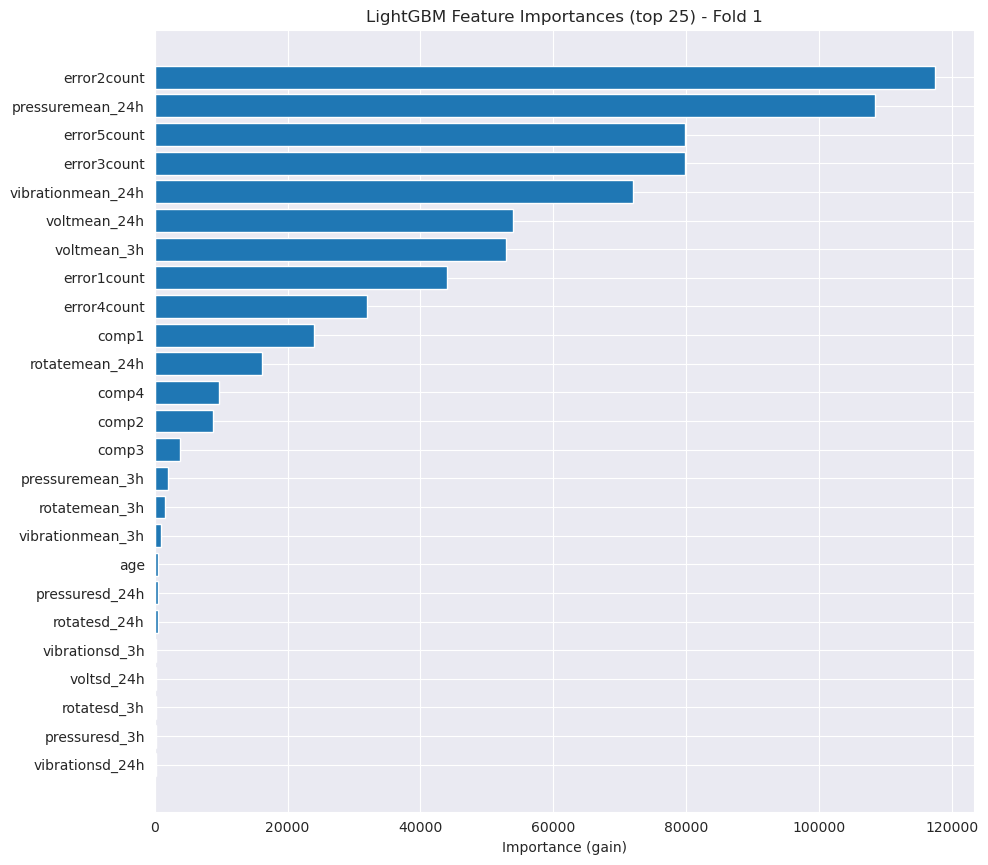

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

def lgbm_importances_df(clf, importance_type="gain") -> pd.DataFrame:
    """
    Devuelve un DataFrame con importancias de LightGBM usando el booster.
    importance_type: 'gain' o 'split'
    """
    booster = clf.booster_
    names = booster.feature_name()
    imps = booster.feature_importance(importance_type=importance_type)
    return pd.DataFrame({"feature": names, importance_type: imps})

# --- toma el primer modelo entrenado ---
clf0 = models[0]

# Importancias por 'gain' y 'split' (opcional tener ambas)
imp_gain = lgbm_importances_df(clf0, "gain")
imp_split = lgbm_importances_df(clf0, "split")

imp = imp_gain.merge(imp_split, on="feature")
imp = imp.sort_values("gain", ascending=False)

top_n = 25  # ajusta a gusto
plot_df = imp.head(top_n)

plt.figure(figsize=(10, max(6, top_n * 0.35)))
plt.barh(plot_df["feature"][::-1], plot_df["gain"][::-1])  # horizontal, top arriba
plt.xlabel("Importance (gain)")
plt.ylabel("")
plt.title(f"LightGBM Feature Importances (top {top_n}) - Fold 1")
plt.tight_layout()
plt.show()


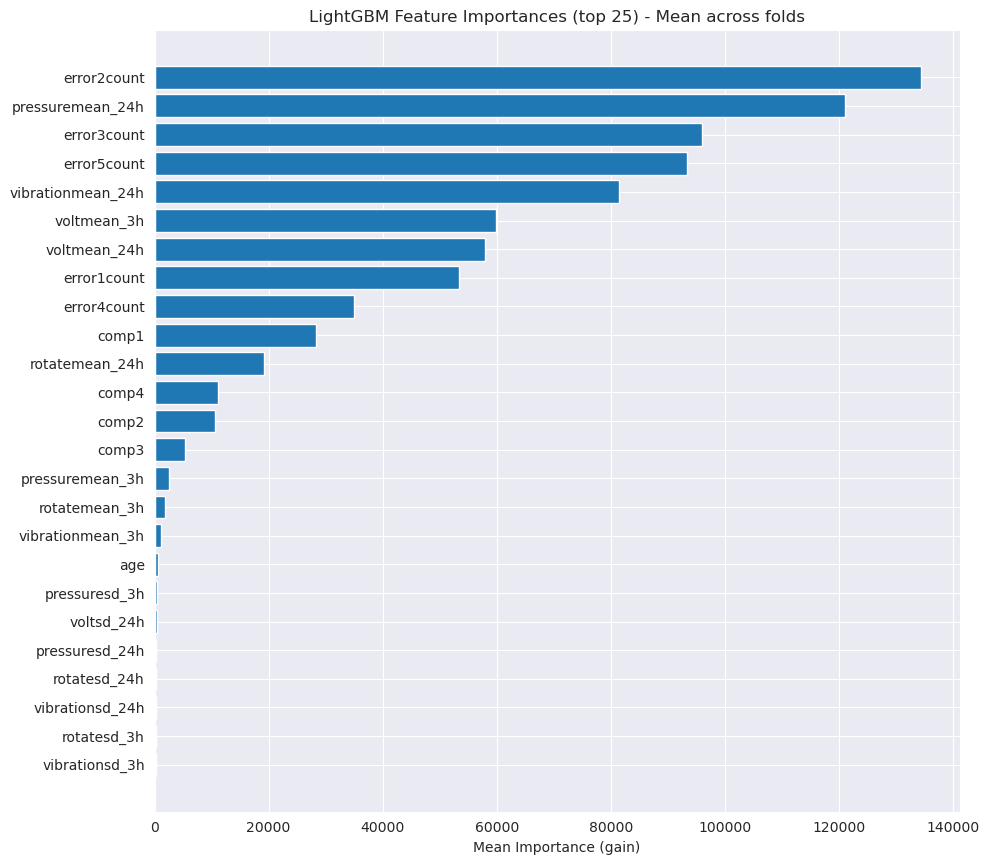

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

def aggregate_mean_importance(models, importance_type="gain") -> pd.DataFrame:
    """
    Promedia importancias de varios modelos LGBM (mismos nombres de features).
    Devuelve DF con columnas: feature, importance_mean
    """
    acc = {}
    for clf in models:
        booster = clf.booster_
        names = booster.feature_name()
        vals = booster.feature_importance(importance_type=importance_type)
        for n, v in zip(names, vals):
            acc[n] = acc.get(n, 0.0) + float(v)

    # promedio
    feats = list(acc.keys())
    vals_mean = np.array([acc[f] for f in feats], dtype=float) / max(len(models), 1)
    df = pd.DataFrame({"feature": feats, f"{importance_type}_mean": vals_mean})
    return df.sort_values(f"{importance_type}_mean", ascending=False)

imp_mean = aggregate_mean_importance(models, importance_type="gain")

top_n = 25
plot_df = imp_mean.head(top_n)

plt.figure(figsize=(10, max(6, top_n * 0.35)))
plt.barh(plot_df["feature"][::-1], plot_df["gain_mean"][::-1])
plt.xlabel("Mean Importance (gain)")
plt.ylabel("")
plt.title(f"LightGBM Feature Importances (top {top_n}) - Mean across folds")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score
)

def evaluate_multiclass(y_pred_labels, y_true_labels, labels):
    """
    y_pred_labels, y_true_labels: arrays/series de etiquetas *originales* (strings)
    labels: lista con el orden fijo de clases (p. ej. list(le.classes_))
    Devuelve: DataFrame con métricas por clase y agregadas (filas) y columnas=labels.
    """
    y_true = np.asarray(y_true_labels)
    y_pred = np.asarray(y_pred_labels)
    L = list(labels)

    # --- Matriz de confusión con orden de clases fijo ---
    cm = confusion_matrix(y_true, y_pred, labels=L)
    total = cm.sum()
    if total == 0:
        raise ValueError("No hay ejemplos para evaluar.")

    # --- Métricas por clase (maneja clases ausentes) ---
    # Nota: sklearn devolverá 0 en clases sin soporte gracias a zero_division=0
    precision = precision_score(y_true, y_pred, labels=L, average=None, zero_division=0)
    recall    = recall_score(y_true,    y_pred, labels=L, average=None, zero_division=0)
    with np.errstate(divide="ignore", invalid="ignore"):
        f1 = 2 * precision * recall / (precision + recall)
        f1[np.isnan(f1)] = 0.0

    # Accuracy global (repetida en cada columna para mantener forma original)
    accuracy_scalar = float(np.trace(cm)) / total
    accuracy = np.full(len(L), accuracy_scalar, dtype=float)

    output = []
    output_labels = []

    # Básicas por clase
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])

    # Macro promedios (repetidos por columna para facilitar lectura)
    macro_precision = np.mean(precision) if len(precision) else 0.0
    macro_recall    = np.mean(recall)    if len(recall)    else 0.0
    macro_f1        = np.mean(f1)        if len(f1)        else 0.0
    output.extend([[macro_precision] * len(L),
                   [macro_recall]    * len(L),
                   [macro_f1]        * len(L)])
    output_labels.extend(['macro precision', 'macro recall', 'macro F1'])

    # Micro (one-vs-all agregado)
    cm_row_sums = cm.sum(axis=1)  # soporte por clase (verdaderos)
    cm_col_sums = cm.sum(axis=0)  # predichos por clase
    s = np.zeros((2, 2), dtype=float)
    for i in range(len(L)):
        tp = cm[i, i]
        fn = cm_row_sums[i] - tp
        fp = cm_col_sums[i] - tp
        tn = total + tp - (cm_row_sums[i] + cm_col_sums[i])
        s += np.array([[tp, fn],
                       [fp, tn]], dtype=float)

    s_row_sums = s.sum(axis=1)
    avg_accuracy = [np.trace(s) / s.sum()] * len(L)
    # En clasificación single-label, micro P=R=F1 = accuracy, pero dejamos fórmula general:
    micro_prec_recall_f1 = [s[0, 0] / s_row_sums[0] if s_row_sums[0] > 0 else 0.0] * len(L)
    output.extend([avg_accuracy, micro_prec_recall_f1])
    output_labels.extend(['average accuracy', 'micro-averaged precision/recall/F1'])

    # Majority-class baseline
    mc_index = int(np.argmax(cm_row_sums))  # clase verdadera más frecuente
    cm_row_dist = cm_row_sums / float(total)
    mc_accuracy  = np.zeros(len(L)); mc_accuracy[mc_index]  = cm_row_dist[mc_index]
    mc_recall    = np.zeros(len(L)); mc_recall[mc_index]    = 1.0
    mc_precision = np.zeros(len(L)); mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_f1        = np.zeros(len(L))
    denom = mc_precision[mc_index] + 1.0
    mc_f1[mc_index] = (2 * mc_precision[mc_index] / denom) if denom > 0 else 0.0

    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_f1.tolist()])
    output_labels.extend(['majority class accuracy', 'majority class recall',
                          'majority class precision', 'majority class F1'])

    # Expected accuracy y Kappa (Cohen) basados en distribuciones
    cm_col_dist = cm_col_sums / float(total)
    exp_accuracy = np.array([float(np.sum(cm_row_dist * cm_col_dist))] * len(L))
    # kappa por columna replicado
    with np.errstate(divide="ignore", invalid="ignore"):
        kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
        kappa[np.isnan(kappa)] = 0.0
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(['expected accuracy', 'kappa'])

    # Random guess (uniforme)
    rg_accuracy  = np.ones(len(L)) / float(len(L))
    rg_precision = cm_row_dist
    rg_recall    = np.ones(len(L)) / float(len(L))
    with np.errstate(divide="ignore", invalid="ignore"):
        rg_F1 = 2 * cm_row_dist / (len(L) * cm_row_dist + 1)
        rg_F1[np.isnan(rg_F1)] = 0.0
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(['random guess accuracy', 'random guess precision',
                          'random guess recall', 'random guess F1'])

    # Random weighted guess (proporcional a la distribución real)
    rwg_accuracy  = np.ones(len(L)) * np.sum(cm_row_dist ** 2)
    rwg_precision = cm_row_dist.copy()
    rwg_recall    = cm_row_dist.copy()
    rwg_F1        = cm_row_dist.copy()
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(['random weighted guess accuracy',
                          'random weighted guess precision',
                          'random weighted guess recall',
                          'random weighted guess F1'])

    out = pd.DataFrame(output, columns=L)
    out.index = output_labels
    return out, cm


In [38]:
# test_results[i] tiene columnas: datetime, machineID, true_failure, predicted_failure, proba_*
metrics_por_fold = []
cms = []

for i, df_fold in enumerate(test_results, start=1):
    mdf, cm = evaluate_multiclass(
        y_pred_labels=df_fold["predicted_failure"].values,
        y_true_labels=df_fold["true_failure"].values,
        labels=list(le.classes_)     # importante: mismo orden siempre
    )
    print(f"\n=== Métricas fold {i} ===")
    print(mdf.loc[["accuracy","macro F1","micro-averaged precision/recall/F1"]])
    metrics_por_fold.append(mdf)
    cms.append(cm)

# (Opcional) promedio simple de métricas a través de folds (mismo índice/columnas):
promedio_metricas = pd.concat(metrics_por_fold).groupby(level=0).mean()
print("\n=== Promedio de métricas en folds ===")
print(promedio_metricas.loc[["accuracy","macro precision","macro recall","macro F1"]])



=== Métricas fold 1 ===
                                       comp1     comp2     comp3     comp4  \
accuracy                            0.999245  0.999245  0.999245  0.999245   
macro F1                            0.977127  0.977127  0.977127  0.977127   
micro-averaged precision/recall/F1  0.999245  0.999245  0.999245  0.999245   

                                        none  
accuracy                            0.999245  
macro F1                            0.977127  
micro-averaged precision/recall/F1  0.999245  

=== Métricas fold 2 ===
                                       comp1     comp2     comp3     comp4  \
accuracy                            0.999392  0.999392  0.999392  0.999392   
macro F1                            0.982093  0.982093  0.982093  0.982093   
micro-averaged precision/recall/F1  0.999392  0.999392  0.999392  0.999392   

                                        none  
accuracy                            0.999392  
macro F1                            0.9820

In [39]:
promedio_metricas

,comp1,comp2,comp3,comp4,none
F1,0.962361,0.994267,0.961859,0.975414,0.999711
accuracy,0.999295,0.999295,0.999295,0.999295,0.999295
average accuracy,0.999718,0.999718,0.999718,0.999718,0.999718
expected accuracy,0.963033,0.963033,0.963033,0.963033,0.963033
kappa,0.980932,0.980932,0.980932,0.980932,0.980932
macro F1,0.978722,0.978722,0.978722,0.978722,0.978722
macro precision,0.985141,0.985141,0.985141,0.985141,0.985141
macro recall,0.972556,0.972556,0.972556,0.972556,0.972556
majority class F1,0.000000,0.000000,0.000000,0.000000,0.990504
majority class accuracy,0.000000,0.000000,0.000000,0.000000,0.981187
